In [29]:
import tensorflow as tf
import numpy as np
from tensorflow_vgg.utils import load_image, print_prob
from nbutil import imshow_multi
import random

def rand_variable(shape, stddev=0.1):
    initial = tf.truncated_normal(shape, stddev=stddev)
    return tf.Variable(initial)

In [3]:
from tensorflow_vgg.vgg19style import Vgg19

In [4]:
image_size = 512
image = rand_variable([1, image_size, image_size, 3])
# vgg = Vgg16(avg_pooling=True)
vgg = Vgg19('../data/vgg19.npy', avg_pooling=True)
with tf.name_scope('content_vgg'):
    vgg.build(image)

npy file loaded
build model started
build model finished: 0s


In [5]:
# labels = list([x.strip() for x in open('tensorflow_vgg/synset.txt').read() if len(x.strip())])
# print len(labels)
# print vgg.prob.get_shape()

In [6]:
session = tf.Session()

In [45]:
content_image = load_image('../data/clouds.jpg', size=image_size).reshape((1,image_size,image_size,3))
content_layer = vgg.conv5_4[0]
session.run(image.assign(content_image))
content_layer.get_shape()
# content_layer_activations = session.run(content_layer)

TensorShape([Dimension(32), Dimension(32), Dimension(512)])

In [48]:
# loss = tf.nn.l2_loss(content_layer - target_content_activations)
channel_n = 3
loss = -tf.reduce_sum(tf.reshape(tf.transpose(content_layer, [2, 0, 1])[channel_n], [-1]))
train = tf.train.AdamOptimizer(0.1).minimize(loss)

In [49]:
%matplotlib inline

init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
session.run(init_op)

img_ = content_image

for i in xrange(50):
    dx = random.randint(-5, 5)
    dy = random.randint(-5, 5)
    img_rolled = np.roll(np.roll(img_, dy, axis=1), dx, axis=2)
    session.run(image.assign(img_rolled))
    
    _, loss_, img_ = session.run([train, loss, image])
    
    img_ = np.roll(np.roll(img_, -dx, axis=2), -dy, axis=1)
    
    if i % 10 == 0:
        print loss_

imshow_multi(img_)
        

-0.0
-0.0


KeyboardInterrupt: 

(1, 512, 512, 3)


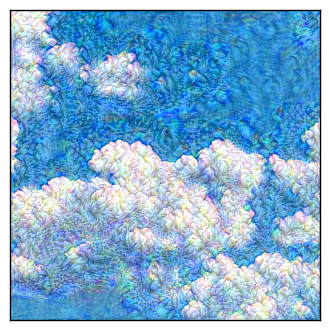

In [39]:
%matplotlib inline

print img_.shape
# print img_.shape
imshow_multi(img_)
